## Import Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# to print all columns
pd.set_option('display.max_columns', None)

## Load Data

In [3]:
# Load your sensor data (assuming it's stored in a CSV file)
df = pd.read_csv('distillation-tower.csv')

# Display the first few rows of the DataFrame
df.head()

Date     Temp1    FlowC1     Temp2    TempC1     Temp3    TempC2  \
0  2000-08-21  139.9857  432.0636  377.8119  100.2204  492.1353  490.1459   
1  2000-08-23  131.0470  487.4029  371.3060  100.2297  482.2100  480.3128   
2  2000-08-26  118.2666  437.3516  378.4483  100.3084  488.7266  487.0040   
3  2000-08-29  118.1769  481.8314  378.0028   95.5766  493.1481  491.1137   
4  2000-08-30  120.7891  412.6471  377.8871   92.9052  490.2486  488.6641   

     TempC3     Temp4  PressureC1     Temp5     Temp6     OC1      Temp7  \
0  180.5578  187.4331    215.0627  489.0043  488.6745  3.1033  1129.6040   
1  172.6575  179.5089    205.0999  479.0443  479.5883  4.7408  1082.9395   
2  165.9400  172.9262    205.0304  485.1326  485.6129  4.2925  1076.9067   
3  167.2085  174.2338    205.2561  490.4338  489.8262  4.4558  1078.9117   
4  167.0326  173.9681    205.0883  486.1049  485.5724  3.4600  1087.4271   

      Temp8   TempC9   FlowC2     Temp9    Temp10  FlowC3   FlowC4   Temp11  \
0  522.4728  86.6133  69.9017  461.2371  513.9653  8.6279  10.5988  30.8983   
1  516.0140  97.6100  69.6900  450.3000  504.5145  8.7662  10.7560  31.9099   
2  514.6193  88.4967  70.5867  458.8101  508.9997  8.5319  10.5737  29.9165   
3  519.3823  95.3483  70.2167  462.5252  514.1794  8.6260  10.6695  30.6229   
4  508.6756  82.9533  69.6567  460.7509  511.0948  8.5939  10.4922  29.4977   

     Temp12  InvTemp1  InvTemp2  InvTemp3  InvPressure1  VapourPressure  
0  489.9900    2.0409    2.6468    2.1681        4.3524         32.5026  
1  480.2888    2.0821    2.6932    2.2207        4.5497         34.8598  
2  486.6190    2.0550    2.6424    2.1796        4.5511         32.1666  
3  491.1304    2.0361    2.6455    2.1620        4.5464         30.4064  
4  487.6475    2.0507    2.6463    2.1704        4.5499         30.9238

## Basic EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            253 non-null    object 
 1   Temp1           253 non-null    float64
 2   FlowC1          253 non-null    float64
 3   Temp2           253 non-null    float64
 4   TempC1          253 non-null    float64
 5   Temp3           253 non-null    float64
 6   TempC2          253 non-null    float64
 7   TempC3          253 non-null    float64
 8   Temp4           253 non-null    float64
 9   PressureC1      253 non-null    float64
 10  Temp5           253 non-null    float64
 11  Temp6           253 non-null    float64
 12  OC1             253 non-null    float64
 13  Temp7           253 non-null    float64
 14  Temp8           253 non-null    float64
 15  TempC9          253 non-null    float64
 16  FlowC2          253 non-null    float64
 17  Temp9           253 non-null    flo

In [5]:
df=df.drop(['Date'], axis=1)
df=df.drop(['InvTemp1'], axis=1)
df=df.drop(['InvTemp2'], axis=1)
df=df.drop(['InvTemp3'], axis=1)
df=df.drop(['InvPressure1'], axis=1)
df=df.drop(['Temp11'], axis=1)

df.head()

Temp1    FlowC1     Temp2    TempC1     Temp3    TempC2    TempC3  \
0  139.9857  432.0636  377.8119  100.2204  492.1353  490.1459  180.5578   
1  131.0470  487.4029  371.3060  100.2297  482.2100  480.3128  172.6575   
2  118.2666  437.3516  378.4483  100.3084  488.7266  487.0040  165.9400   
3  118.1769  481.8314  378.0028   95.5766  493.1481  491.1137  167.2085   
4  120.7891  412.6471  377.8871   92.9052  490.2486  488.6641  167.0326   

      Temp4  PressureC1     Temp5     Temp6     OC1      Temp7     Temp8  \
0  187.4331    215.0627  489.0043  488.6745  3.1033  1129.6040  522.4728   
1  179.5089    205.0999  479.0443  479.5883  4.7408  1082.9395  516.0140   
2  172.9262    205.0304  485.1326  485.6129  4.2925  1076.9067  514.6193   
3  174.2338    205.2561  490.4338  489.8262  4.4558  1078.9117  519.3823   
4  173.9681    205.0883  486.1049  485.5724  3.4600  1087.4271  508.6756   

    TempC9   FlowC2     Temp9    Temp10  FlowC3   FlowC4    Temp12  \
0  86.6133  69.9017  461.2371  513.9653  8.6279  10.5988  489.9900   
1  97.6100  69.6900  450.3000  504.5145  8.7662  10.7560  480.2888   
2  88.4967  70.5867  458.8101  508.9997  8.5319  10.5737  486.6190   
3  95.3483  70.2167  462.5252  514.1794  8.6260  10.6695  491.1304   
4  82.9533  69.6567  460.7509  511.0948  8.5939  10.4922  487.6475   

   VapourPressure  
0         32.5026  
1         34.8598  
2         32.1666  
3         30.4064  
4         30.9238

In [6]:
df.describe()

Temp1      FlowC1       Temp2      TempC1       Temp3      TempC2  \
count  253.000000  253.000000  253.000000  253.000000  253.000000  253.000000   
mean   132.441662  308.878978  372.272493  101.924035  482.471458  480.821533   
std     12.026306   83.406894   14.757763   15.093537   18.548515   18.580542   
min    111.025900  174.742800  318.447000   75.584700  420.777700  419.017500   
25%    121.602000  235.286300  362.766400   88.979000  471.457000  469.819900   
50%    130.170300  292.910900  373.380100  100.220400  483.847800  482.257700   
75%    140.520900  370.814200  383.123900  116.323200  495.428300  493.491500   
max    168.040200  505.668100  406.740000  132.199400  528.080700  526.392000   

           TempC3       Temp4  PressureC1       Temp5       Temp6         OC1  \
count  253.000000  253.000000  253.000000  253.000000  253.000000  253.000000   
mean   175.194760  181.729203  238.590831  478.745147  479.274850    4.391519   
std     13.943948   14.067880   13.924949   18.536614   18.707989    1.401471   
min    119.214000  124.599400  199.823400  418.619400  419.295000    1.858300   
25%    169.516300  176.270900  225.830200  467.591100  468.080700    3.075000   
50%    175.550900  182.210200  241.410400  480.201800  480.543200    3.983300   
75%    183.770700  190.471500  250.039600  490.862100  492.395800    5.593300   
max    229.411100  235.624400  254.590000  524.787700  525.314300    8.501700   

             Temp7       Temp8      TempC9      FlowC2       Temp9  \
count   253.000000  253.000000  253.000000  253.000000  253.000000   
mean   1041.627738  484.602761   62.040853   73.341751  460.669378   
std      69.091579   24.824040   16.909747    3.249773   17.611326   
min     890.108400  421.454200   34.510000   61.136700  400.316400   
25%     981.520100  466.832900   46.880000   71.267800  449.230800   
50%    1047.116300  482.221500   58.740000   73.156700  462.067000   
75%    1098.242600  503.502000   75.180000   74.696700  471.448400   
max    1179.202600  557.359100   99.982900   83.593300  507.314900   

           Temp10      FlowC3      FlowC4      Temp12  VapourPressure  
count  253.000000  253.000000  253.000000  253.000000      253.000000  
mean   497.979526    6.671970    8.227488  480.328241       36.649317  
std     20.487860    1.168602    1.549983   18.562388        6.841153  
min    432.448300    4.617000    5.847000  419.427400       25.156000  
25%    485.878600    5.577700    6.867600  468.911600       31.980800  
50%    498.954700    6.523900    7.992700  482.054100       34.849700  
75%    513.039300    7.584500    9.901000  492.791500       40.639900  
max    547.132800    8.847300   10.756000  526.143700       64.313500

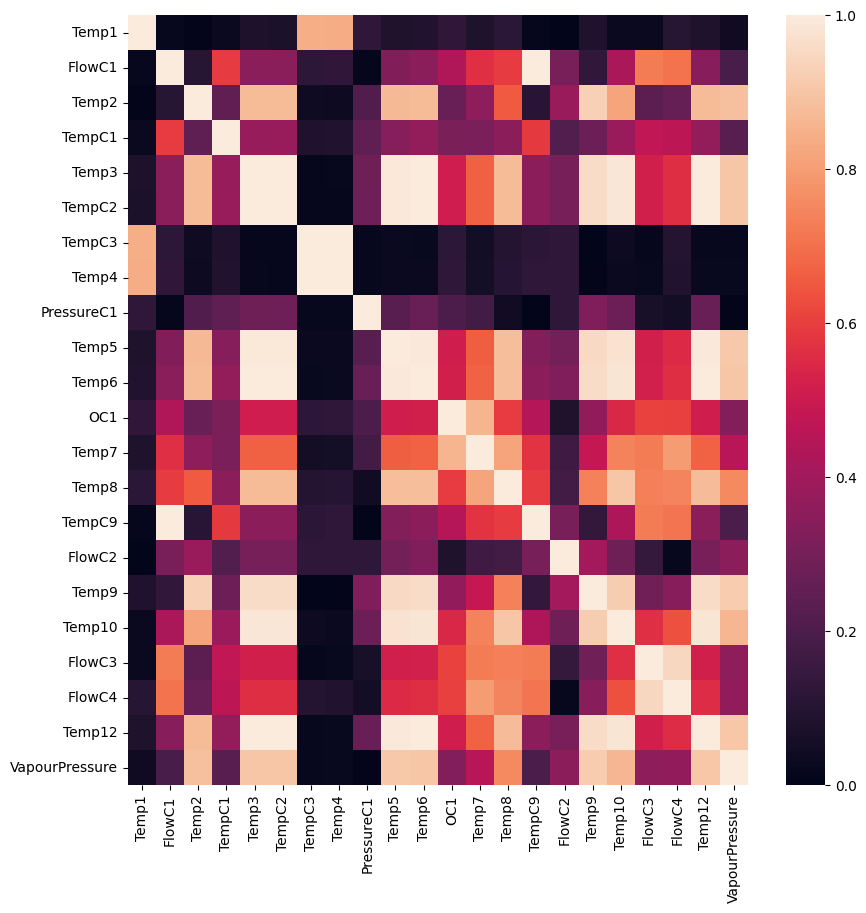

In [7]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10,10))
#sns.color_palette("magma", as_cmap=True)
sns.heatmap(abs(df.corr()),vmin=0, vmax=1)
plt.show()

In [8]:
df.isna().sum()

Temp1             0
FlowC1            0
Temp2             0
TempC1            0
Temp3             0
TempC2            0
TempC3            0
Temp4             0
PressureC1        0
Temp5             0
Temp6             0
OC1               0
Temp7             0
Temp8             0
TempC9            0
FlowC2            0
Temp9             0
Temp10            0
FlowC3            0
FlowC4            0
Temp12            0
VapourPressure    0
dtype: int64

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Function to augment data
def augment_data(original_data, num_augmented_samples, noise_level=0.1):

    augmented_data = []
    for sample in original_data:
        # Generate num_augmented_samples for each original sample
        for _ in range(num_augmented_samples):
            # Apply data augmentation (Gaussian noise)
            noise = np.random.normal(0, noise_level, size=sample.shape)
            augmented_sample = sample + noise
            # Append the augmented sample to the list
            augmented_data.append(augmented_sample)

    return np.array(augmented_data)

# Apply data augmentation
num_augmented_samples = 5  # Adjust as needed
augmented_data = augment_data(df.values, num_augmented_samples)

# Feature scaling
scaler = MinMaxScaler()
normalized_data  = scaler.fit_transform(augmented_data)

# Check the shape of the scaled data
print(normalized_data.shape)

(1265, 22)


In [10]:
print(normalized_data[:5])  # Display the first 5 rows of the scaled data

[[0.51174221 0.77704205 0.67088354 0.44039867 0.66559724 0.66268307
  0.55610099 0.5668357  0.27816568 0.6630695  0.65494201 0.23395469
  0.82784459 0.74163122 0.79705199 0.39296631 0.5684118  0.71026178
  0.95832829 0.98031921 0.66120339 0.18681793]
 [0.51309681 0.77788599 0.6724381  0.43505456 0.66513831 0.66132548
  0.55668475 0.56546925 0.2790171  0.6618346  0.65370598 0.21418122
  0.82848098 0.74058401 0.79562209 0.39086378 0.56862635 0.71005756
  0.9499494  0.94127995 0.66169318 0.19111523]
 [0.50790069 0.77805881 0.67180315 0.44067602 0.6665112  0.66247507
  0.5569896  0.56686186 0.27857969 0.66396679 0.65512788 0.21239688
  0.82933381 0.74302125 0.7964129  0.39084124 0.56782989 0.71133637
  0.93763988 0.94983565 0.66074951 0.18651846]
 [0.50745193 0.7772874  0.67023616 0.43527345 0.66579807 0.66204902
  0.55487995 0.5652592  0.28307144 0.66333765 0.65475829 0.17348299
  0.8280617  0.74338866 0.79821517 0.39478406 0.56953223 0.71058059
  0.97231433 0.96082593 0.6607407  0.187583

In [11]:
# Preprocess data (normalize augmented data)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(augmented_data)

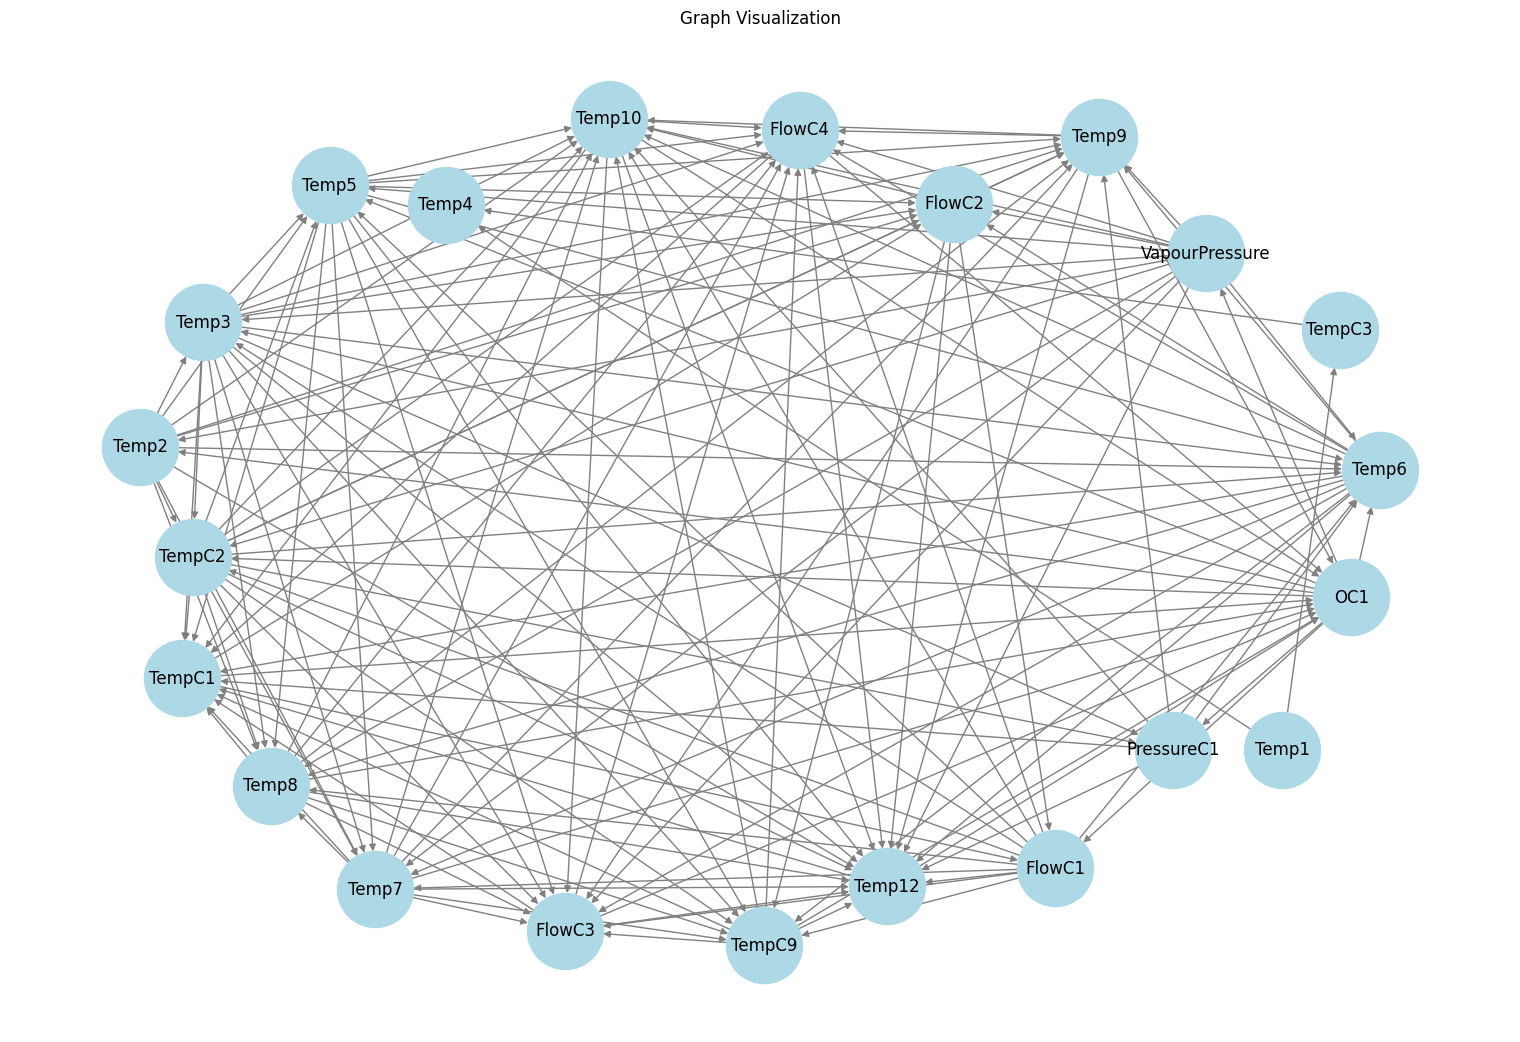

Connection: (0, 6), Weight: 0.92
Connection: (0, 7), Weight: 0.92
Connection: (6, 7), Weight: 1.00
Connection: (3, 1), Weight: -0.60
Connection: (3, 11), Weight: 0.26
Connection: (3, 15), Weight: 0.31
Connection: (1, 4), Weight: 0.36
Connection: (1, 5), Weight: 0.36
Connection: (1, 9), Weight: 0.34
Connection: (1, 10), Weight: 0.35
Connection: (1, 12), Weight: 0.58
Connection: (1, 13), Weight: 0.60
Connection: (1, 14), Weight: 1.00
Connection: (1, 17), Weight: 0.44
Connection: (1, 18), Weight: 0.68
Connection: (1, 19), Weight: 0.70
Connection: (1, 20), Weight: 0.35
Connection: (4, 3), Weight: -0.32
Connection: (4, 5), Weight: 1.00
Connection: (4, 8), Weight: 0.29
Connection: (4, 9), Weight: 0.99
Connection: (4, 10), Weight: 1.00
Connection: (4, 12), Weight: 0.67
Connection: (4, 13), Weight: 0.86
Connection: (4, 14), Weight: 0.37
Connection: (4, 15), Weight: 0.31
Connection: (4, 16), Weight: 0.95
Connection: (4, 17), Weight: 0.98
Connection: (4, 18), Weight: 0.53
Connection: (4, 19), We

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from scipy.stats import spearmanr
import networkx as nx
import matplotlib.pyplot as plt

# Define model parameters
input_dim = len(df.columns)
hidden_dim = 32
dropout_rate = 0.5

# Define GNN model class
class GNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, adjacency_matrix):
        super(GNNModel, self).__init__()
        self.adjacency_matrix = torch.tensor(adjacency_matrix, dtype=torch.float32)
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.gc1 = nn.Linear(hidden_dim, hidden_dim)  # New GCN layer
        self.gc2 = nn.Linear(hidden_dim, hidden_dim)  # New GCN layer
        self.fc2 = nn.Linear(hidden_dim, input_dim)
        self.dropout = nn.Dropout(dropout_rate)  # Add dropout layer

    def forward(self, x):
        # Perform graph convolution operation using the adjacency matrix
        # Multiply the input by the adjacency matrix to aggregate information from neighbors
        x = torch.matmul(x, self.adjacency_matrix)
        # Pass the aggregated information through linear and activation layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.gc1(x))  # Apply first GCN layer
        x = F.relu(self.gc2(x))  # Apply second GCN layer
        # Apply dropout after the hidden layers
        x = self.dropout(x)
        # Pass through the final linear layer for output
        x = self.fc2(x)
        return x

import scipy.stats as stats

# Assuming 'normalized_data' is your augmented and normalized data
correlation_matrix = np.zeros((input_dim, input_dim))
correlation_matrix = stats.spearmanr(normalized_data, axis=0).correlation


# Construct graph based on correlation threshold
threshold = 0.25
edges = []
for i in range(input_dim):
  for j in range(i + 1, input_dim):
    correlation = correlation_matrix[i, j]  # Access correlation without abs()
    if abs(correlation) > threshold:
      if correlation > 0:  # Positive correlation
        edges.append((i, j))  # Edge from i to j (i increases -> j increases)
      else:  # Negative correlation
        edges.append((j, i))  # Edge from j to i (j increases -> i decreases)


# Create adjacency matrix from edges with Spearman correlation values as weights
adjacency_matrix = np.zeros((input_dim, input_dim))
for edge in edges:
    i, j = edge
    adjacency_matrix[i, j] = correlation_matrix[i, j]

# Create a graph object
G = nx.DiGraph()

# Add edges with weights to the graph
for i, j in edges:
    weight = adjacency_matrix[i, j]
    G.add_edge(i, j, weight=weight)

# Extract sensor names from the dataset columns
sensor_names = df.columns.tolist()

# Initialize a mapping dictionary to map node indices to sensor names
node_mapping = {node_index: sensor_names[node_index] for node_index in G.nodes()}

# Now, use this mapping dictionary to generate node labels
node_labels = {node_index: node_mapping[node_index] for node_index in G.nodes()}

# Draw the graph with node labels and adjusted layout
plt.figure(figsize=(15, 10))  # Set figure size
pos = nx.spring_layout(G, k=4)
nx.draw(G, pos, with_labels=False, node_size=3000, font_size=12, arrows=True, node_color='lightblue', edge_color='gray')
nx.draw_networkx_labels(G, pos, labels=node_labels)  # Add node labels
plt.title("Graph Visualization")
plt.show()


# Initialize lists to store connections and weights
connections = []
weights = []

# Iterate through edges and get corresponding weights
for i, j in edges:
    connections.append((i, j))
    weights.append(adjacency_matrix[i, j])

# Print connections and their corresponding weights
for conn in G.edges(data=True):
    print(f"Connection: {conn[:2]}, Weight: {conn[2]['weight']:.2f}")

In [13]:
# Split data into training and testing sets
X_train, X_test = train_test_split(normalized_data, test_size=0.15, random_state=42)

# Train the model
model = GNNModel(input_dim, hidden_dim, adjacency_matrix)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
model.train()
for epoch in range(100):
    optimizer.zero_grad()
    out = model(torch.tensor(X_train, dtype=torch.float32))
    loss = criterion(out, torch.tensor(X_train, dtype=torch.float32))
    loss.backward()
    optimizer.step()
    # Print the loss of the current epoch
    print(f"Epoch [{epoch+1}/100], Loss: {loss.item()}")

# Evaluate the model on the test data
model.eval()
with torch.no_grad():
    test_output = model(torch.tensor(X_test, dtype=torch.float32))
    # Calculate Mean Squared Error (MSE) per sensor for test data
    mse_per_sensor_test = torch.mean((test_output - torch.tensor(X_test, dtype=torch.float32))**2, dim=0)
    # Calculate Mean Absolute Error (MAE) per sensor for test data
    mae_per_sensor_test = torch.mean(torch.abs(test_output - torch.tensor(X_test, dtype=torch.float32)), dim=0)
    # Calculate average MSE and MAE for test data
    average_mse_test = torch.mean(mse_per_sensor_test)
    average_mae_test = torch.mean(mae_per_sensor_test)

# Evaluate the model on the training data (for monitoring purposes)
model.eval()
with torch.no_grad():
    train_output = model(torch.tensor(X_train, dtype=torch.float32))
    # Calculate Mean Squared Error (MSE) per sensor for training data
    mse_per_sensor_train = torch.mean((train_output - torch.tensor(X_train, dtype=torch.float32))**2, dim=0)
    # Calculate Mean Absolute Error (MAE) per sensor for training data
    mae_per_sensor_train = torch.mean(torch.abs(train_output - torch.tensor(X_train, dtype=torch.float32)), dim=0)
    # Calculate average MSE and MAE for training data
    average_mse_train = torch.mean(mse_per_sensor_train)
    average_mae_train = torch.mean(mae_per_sensor_train)

# Print the MSE and MAE for each sensor (test and training)
print("MSE per sensor (test data):", mse_per_sensor_test.tolist())
print("MAE per sensor (test data):", mae_per_sensor_test.tolist())
print("MSE per sensor (training data):", mse_per_sensor_train.tolist())
print("MAE per sensor (training data):", mae_per_sensor_train.tolist())

# Print the average MSE and MAE (test and training)
print("Average MSE (test data):", average_mse_test.item())
print("Average MAE (test data):", average_mae_test.item())
print("Average MSE (training data):", average_mse_train.item())
print("Average MAE (training data):", average_mae_train.item())

Epoch [1/100], Loss: 0.2722487449645996
Epoch [2/100], Loss: 0.26551327109336853
Epoch [3/100], Loss: 0.25967127084732056
Epoch [4/100], Loss: 0.254530131816864
Epoch [5/100], Loss: 0.24862848222255707
Epoch [6/100], Loss: 0.24435792863368988
Epoch [7/100], Loss: 0.2384854555130005
Epoch [8/100], Loss: 0.23336569964885712
Epoch [9/100], Loss: 0.2293185144662857
Epoch [10/100], Loss: 0.22320173680782318
Epoch [11/100], Loss: 0.2185419350862503
Epoch [12/100], Loss: 0.21301059424877167
Epoch [13/100], Loss: 0.20544761419296265
Epoch [14/100], Loss: 0.2002670019865036
Epoch [15/100], Loss: 0.19441410899162292
Epoch [16/100], Loss: 0.1875975877046585
Epoch [17/100], Loss: 0.18162813782691956
Epoch [18/100], Loss: 0.17769350111484528
Epoch [19/100], Loss: 0.17067374289035797
Epoch [20/100], Loss: 0.16528888046741486
Epoch [21/100], Loss: 0.16143926978111267
Epoch [22/100], Loss: 0.15473699569702148
Epoch [23/100], Loss: 0.15098389983177185
Epoch [24/100], Loss: 0.1457231193780899
Epoch [25/

Learned Weights:
[[ 0.17064592 -0.26653913 -0.09735766 -0.2131351  -0.1666628  -0.239984
   0.22010532  0.0132537  -0.1366873  -0.01276292 -0.17059167 -0.09957177
  -0.07381149 -0.00749727 -0.21269383 -0.0360574  -0.03533398 -0.16558059
   0.02083435  0.13825329  0.04260862  0.2902833 ]
 [-0.01097915 -0.03928509 -0.03506897 -0.10840326 -0.22784087 -0.19116987
  -0.12893991 -0.09662921  0.06295446 -0.20766501  0.03408428 -0.15702192
   0.06301943 -0.00875392 -0.08526605  0.09550967  0.08467867 -0.01871475
   0.13919716  0.20620064 -0.16721106 -0.0646946 ]
 [-0.19148299 -0.04616521 -0.16283877 -0.14621216  0.05161332  0.16542733
  -0.16869715 -0.02909459  0.04133544  0.14114247 -0.17352791 -0.21385697
   0.18474348  0.0882727  -0.18060954 -0.0082375   0.0147448  -0.09118442
  -0.06065751  0.08501511 -0.0354236   0.17499991]
 [ 0.04025531  0.10088729 -0.03218896 -0.20411675  0.20790736  0.1660188
  -0.01995224 -0.17245409  0.18222402 -0.02246775 -0.19720459  0.00663757
   0.03976869 -0.14

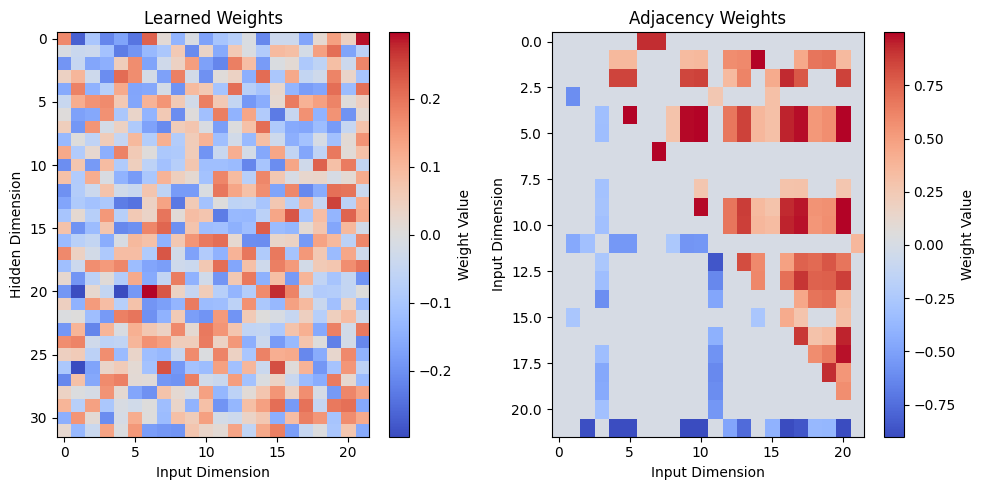

In [14]:
# Get the learned weights from the model
learned_weights = model.fc1.weight.detach().numpy()

# Print the learned weights and compare with adjacency weights
print("Learned Weights:")
print(learned_weights)
print("Adjacency Weights:")
print(adjacency_matrix)

# Plot the comparison between learned and adjacency weights
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(learned_weights, cmap='coolwarm', aspect='auto')
plt.title('Learned Weights')
plt.colorbar(label='Weight Value')
plt.xlabel('Input Dimension')
plt.ylabel('Hidden Dimension')

plt.subplot(1, 2, 2)
plt.imshow(adjacency_matrix, cmap='coolwarm', aspect='auto')
plt.title('Adjacency Weights')
plt.colorbar(label='Weight Value')
plt.xlabel('Input Dimension')
plt.ylabel('Input Dimension')

plt.tight_layout()
plt.show()

### **Give the data, you want to test on here**

In [16]:
external_test_data = pd.read_csv('test.csv')
external_test_data.head()

Temp1    FlowC1     Temp2    TempC1     Temp3    TempC2    TempC3  \
0  114.4047  281.6030  406.7400  100.1649  528.0807  526.3920  119.2140   
1  143.0868  370.6435  397.6131   90.5532  526.3503  524.8129  191.0229   
2  143.0868  370.6435  397.6131   90.5532  529.0000  524.8129  191.0229   
3  143.0868  370.6435  397.6131   90.5532  520.0000  524.8129  191.0229   
4  143.0868  370.6435  397.6131   90.5532  519.0000  524.8129  191.0229   

      Temp4  PressureC1  Temp5     Temp6     OC1      Temp7     Temp8  \
0  124.5994    250.2161    418  525.3143  3.0500  1136.1923  527.5541   
1  197.4386    239.9495    418  524.0932  2.9711  1179.2026  539.7538   
2  197.4386    239.9495    418  524.0932  2.9711  1179.2026  539.7538   
3  197.4386    239.9495    418  524.0932  2.9711  1179.2026  539.7538   
4  197.4386    239.9495    418  524.0932  2.9711  1179.2026  539.7538   

    TempC9   FlowC2     Temp9    Temp10  FlowC3  FlowC4    Temp12  \
0  57.4533  80.5233  507.3149  547.1328  6.8928  9.0651  526.1437   
1  75.6800  73.6267  496.8015  545.8074  8.0423  9.9873  524.4699   
2  75.6800  73.6267  496.8015  545.8074  8.0423  9.9873  524.4699   
3  75.6800  73.6267  496.8015  545.8074  8.0423  9.9873  524.4699   
4  75.6800  73.6267  496.8015  545.8074  8.0423  9.9873  524.4699   

   VapourPressure  
0         27.0864  
1         25.1560  
2         25.1560  
3         25.1560  
4         25.1560

In [17]:
# normalize external testing data
normalized_external_test_data = scaler.transform(external_test_data.values)
normalized_external_test_data = torch.tensor(normalized_external_test_data, dtype=torch.float32)

MSE per sensor (external testing data): [0.03926868736743927, 0.002491061110049486, 0.028713025152683258, 0.008005796000361443, 0.06575614959001541, 0.03975643962621689, 0.022913239896297455, 0.025708701461553574, 0.005820657592266798, 0.5854597091674805, 0.07012905180454254, 0.004574034828692675, 0.08537311851978302, 0.10740850865840912, 0.002013817662373185, 0.005177252925932407, 0.05882234871387482, 0.05174664035439491, 0.022939780727028847, 0.003813056740909815, 0.094044990837574, 0.061813849955797195]
Anomalous sensor names, indices, and MSE (external testing data):
Sensor Index: 9, Name: Temp5, MSE: 0.5854597091674805
Dynamic Threshold for anomaly detection (percentile-based): 0.3


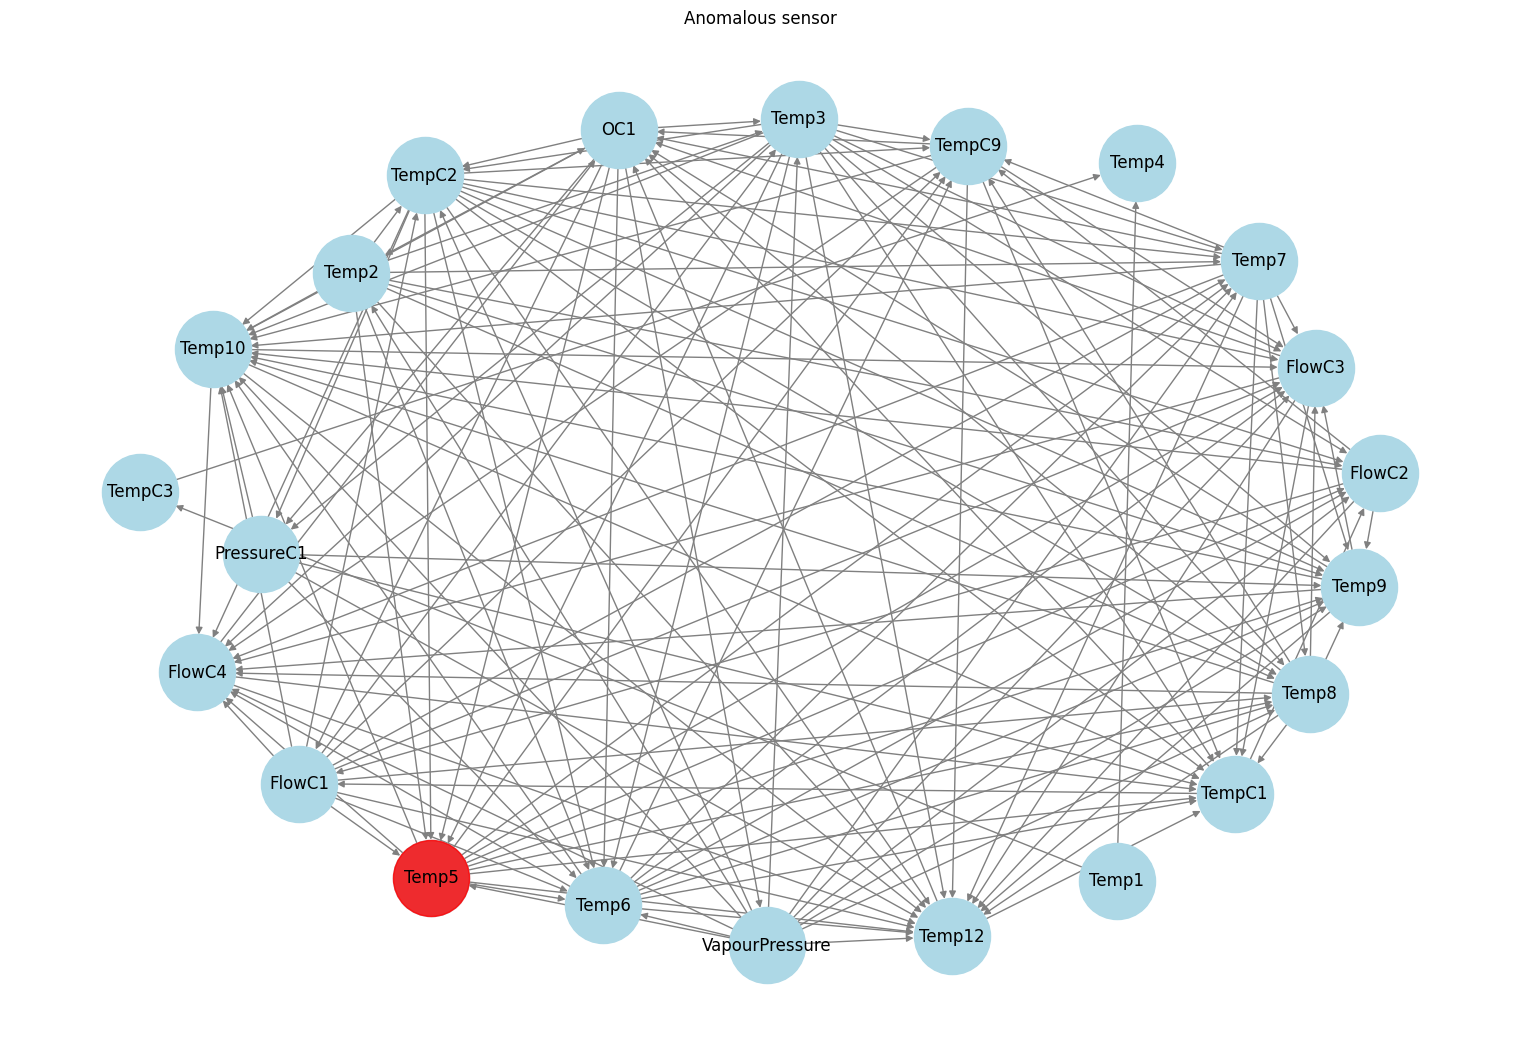

In [18]:
threshold_percentile = 90

with torch.no_grad():
    external_test_output = model(normalized_external_test_data)
    mse_per_sensor_external = torch.mean((normalized_external_test_data - external_test_output)**2, dim=0)

# Sort MSE values in ascending order
mse_sorted, _ = torch.sort(mse_per_sensor_external)

# Threshold index based on percentile
threshold_index = int((threshold_percentile / 100) * len(mse_sorted))

# Set minimum threshold
minimum_threshold = 0.3  # Adjust this value as needed

# Dynamic threshold based on percentile
threshold_external = mse_sorted[threshold_index]

# Ensure the dynamic threshold is not below the minimum threshold
threshold_external = max(threshold_external, minimum_threshold)
# Get list of anomaly sensor indices based on percentile threshold
anomalous_indices_external = torch.nonzero(mse_per_sensor_external > threshold_external).squeeze().tolist()

# Convert anomalous_indices_external to list if it's not already
if not isinstance(anomalous_indices_external, list):
    anomalous_indices_external = [anomalous_indices_external]

# Print results
print("MSE per sensor (external testing data):", mse_per_sensor_external.tolist())
# Initialize lists to store the names, indices, and MSEs of anomalous sensors and excluded sensors
anomalous_sensor_names = [sensor_names[idx] for idx in anomalous_indices_external]
anomalous_sensor_indices = anomalous_indices_external

# Print the names, indices, and MSEs of the anomalous sensors
print("Anomalous sensor names, indices, and MSE (external testing data):")
for idx, name, mse in zip(anomalous_sensor_indices, anomalous_sensor_names, mse_per_sensor_external[anomalous_indices_external]):
    print(f"Sensor Index: {idx}, Name: {name}, MSE: {mse.item()}")

print(f"Dynamic Threshold for anomaly detection (percentile-based): {threshold_external}")

# Extract sensor names from the dataset columns
sensor_names = df.columns.tolist()

# Create a mapping between node names and their positions
node_positions = {node_index: pos[node_index] for node_index in G.nodes()}

# Draw the graph with light colored nodes and adjusted layout
plt.figure(figsize=(15, 10))  # Set figure size
pos = nx.spring_layout(G, k=6)  # positions for all nodes with larger distance between them
nx.draw(G, pos, with_labels=False, node_size=3000, font_size=12, arrows=True, node_color='lightblue', edge_color='gray')

# Highlight anomalous sensors in red
for idx, name in enumerate(sensor_names):
    if idx in anomalous_indices_external:
        nx.draw_networkx_nodes(G, pos, nodelist=[idx], node_color='red', node_size=3000, alpha=0.8)

# Ensure that node_labels dictionary matches the node indices in G
node_labels = {node_index: sensor_names[node_index] for node_index in G.nodes()}

nx.draw_networkx_labels(G, pos, labels=node_labels)  # Add node labels using the node_positions mapping

# Show the plot
plt.title("Anomalous sensor")
plt.show()

## Changes

In [19]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

class GCNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_features_per_sensor):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, num_features_per_sensor)  # Output size adjusted
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)

        # Final output layer
        x = self.fc(x)
        return x

In [26]:
# Assuming `adjacency_matrix` is available and converted to edge indices
edge_index = torch.nonzero(torch.tensor(adjacency_matrix), as_tuple=False).t().contiguous()

# Assuming `sensor_features` contains your normalized sensor values as a feature matrix
x = torch.tensor(normalized_data, dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

In [27]:
# Assuming 'normalized_data' is a numpy array containing your scaled sensor data
x = torch.tensor(normalized_data, dtype=torch.float)

# You can now check if 'x' is correctly defined
print("Shape of feature matrix x:", x.shape)  # This should output the shape of your data matrix

Shape of feature matrix x: torch.Size([1265, 22])


In [28]:
# Initialize the model with the correct feature size
model = GCNModel(input_dim=x.size(1), hidden_dim=hidden_dim, num_features_per_sensor=1)  # Adjusted input_dim and num_features_per_sensor
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

In [29]:
from torch_geometric.data import Data

# Ensure edge_index is defined, as well as 'x'
data = Data(x=x, edge_index=edge_index)

# If you have target sensor values separate from input features, set 'data.y'
# data.y = torch.tensor(target_values, dtype=torch.float)  # Uncomment if you have separate target values

In [38]:
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x)  # Use data.x instead of data
    # Use data.x as target if data.y is not defined
    loss = criterion(out, data.x)
    loss.backward(retain_graph=True)
    optimizer.step()
    return loss

# for epoch in range(200):
#     loss = train()
#     print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# sensor index is used to determine which sensor's data you want to use for model's input
# I have set it to 9 to use the corresponding temp5 sensor's data
sensor_index = 9
data = Data(x=x[:, sensor_index].unsqueeze(1), edge_index=edge_index)  # Adjust input data for each sensor

In [39]:
import torch_geometric
from torch_geometric.data import Data

# Example of converting datasets to Graph Data Objects
train_data = Data(x=torch.tensor(X_train, dtype=torch.float32), edge_index=edge_index)
test_data = Data(x=torch.tensor(X_test, dtype=torch.float32), edge_index=edge_index)

# Initialize the model
model = GNNModel(input_dim, hidden_dim, adjacency_matrix)
test_output = model(test_data.x)

In [40]:
# make graph data object
external_test_data = Data(x=normalized_external_test_data, edge_index=edge_index)

# Evaluate the model on the external test data
model.eval()
with torch.no_grad():
    external_test_output = model(external_test_data.x)
    mse_per_sensor_external = torch.mean((external_test_output - external_test_data.x)**2, dim=0)

# Sort MSE values in ascending order
mse_sorted, _ = torch.sort(mse_per_sensor_external)

# Threshold index based on percentile
threshold_index = int((threshold_percentile / 100) * len(mse_sorted))

# Set minimum threshold
minimum_threshold = 0.3 

# Dynamic threshold based on percentile
threshold_external = mse_sorted[threshold_index]

# Ensure the dynamic threshold is not below the minimum threshold
threshold_external = max(threshold_external, minimum_threshold)
# Get list of anomaly sensor indices based on percentile threshold
anomalous_indices_external = torch.nonzero(mse_per_sensor_external > threshold_external).squeeze().tolist()

# Convert anomalous_indices_external to list if it's not already
if not isinstance(anomalous_indices_external, list):
    anomalous_indices_external = [anomalous_indices_external]

# Print results
print("MSE per sensor (external testing data):", mse_per_sensor_external.tolist())

MSE per sensor (external testing data): [0.4591759741306305, 0.627696692943573, 0.2621394693851471, 0.005980104207992554, 1.1362359523773193, 1.3918665647506714, 0.32875856757164, 0.29169347882270813, 0.19592814147472382, 0.00020445717382244766, 0.6480957269668579, 0.025349704548716545, 0.838284432888031, 0.6914095878601074, 0.2098672091960907, 0.8674852252006531, 0.906596839427948, 1.499859094619751, 1.1898539066314697, 0.5869608521461487, 0.9933353662490845, 0.0880919024348259]


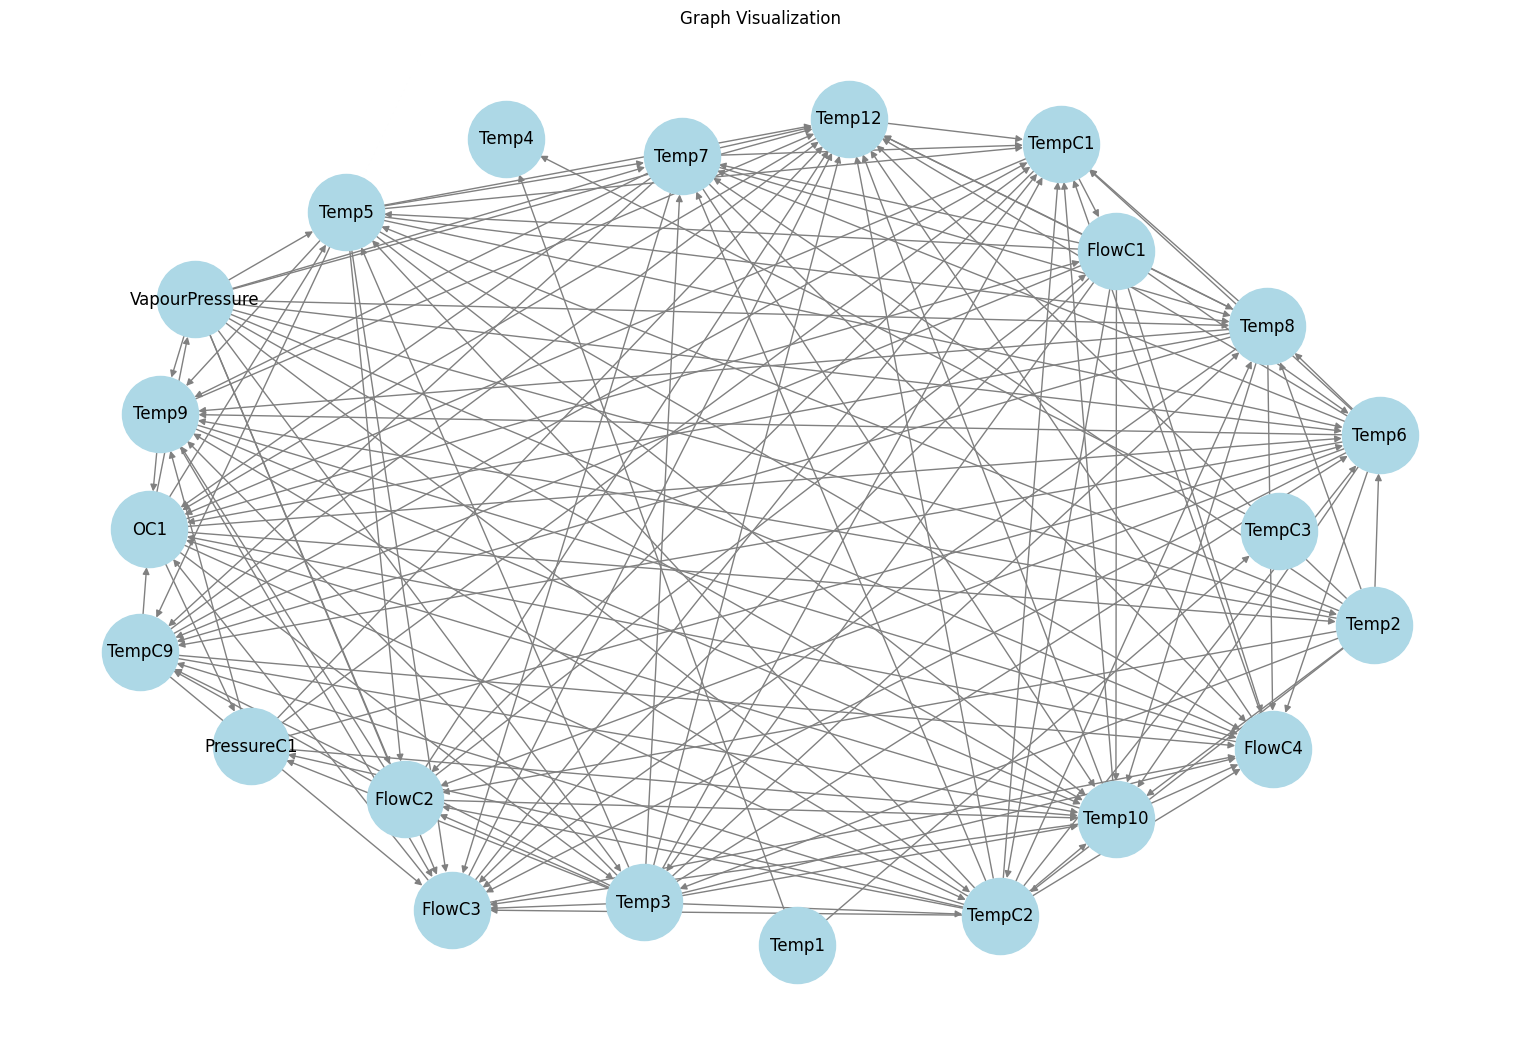

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch_geometric.data import Data

# Example: Assuming 'edges' and 'adjacency_matrix' are already defined as per your previous code

# Create a NetworkX graph for visualization
G = nx.DiGraph()
for i, j in edges:
    weight = adjacency_matrix[i, j]
    G.add_edge(i, j, weight=weight)

# Visualize the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=4)  # Position nodes using Spring layout
nx.draw(G, pos, with_labels=False, node_size=3000, font_size=12, arrows=True, node_color='lightblue', edge_color='gray')
node_labels = {i: df.columns[i] for i in G.nodes()}  # Assuming 'df' is your DataFrame with column names
nx.draw_networkx_labels(G, pos, labels=node_labels)
plt.title("Graph Visualization")
plt.show()

# Convert NetworkX graph to PyTorch Geometric Data (if needed)
# This step depends on whether your model setup requires a fresh conversion
edge_index = torch.tensor(list(G.edges())).t().contiguous()
x = torch.tensor(normalized_data, dtype=torch.float)  # Assuming normalized_data is defined
data = Data(x=x, edge_index=edge_index)

## Testing

In [42]:
# and 'edge_index' is defined from your graph construction phase
test_data = Data(x=normalized_external_test_data, edge_index=edge_index)

In [43]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCNModel(torch.nn.Module):
    def __init__(self, num_features, hidden_channels):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.out = torch.nn.Linear(hidden_channels, 1)  # Adjust the output dimensions as necessary

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.out(x)
        return x

In [44]:
external_test_output = model(test_data.x)

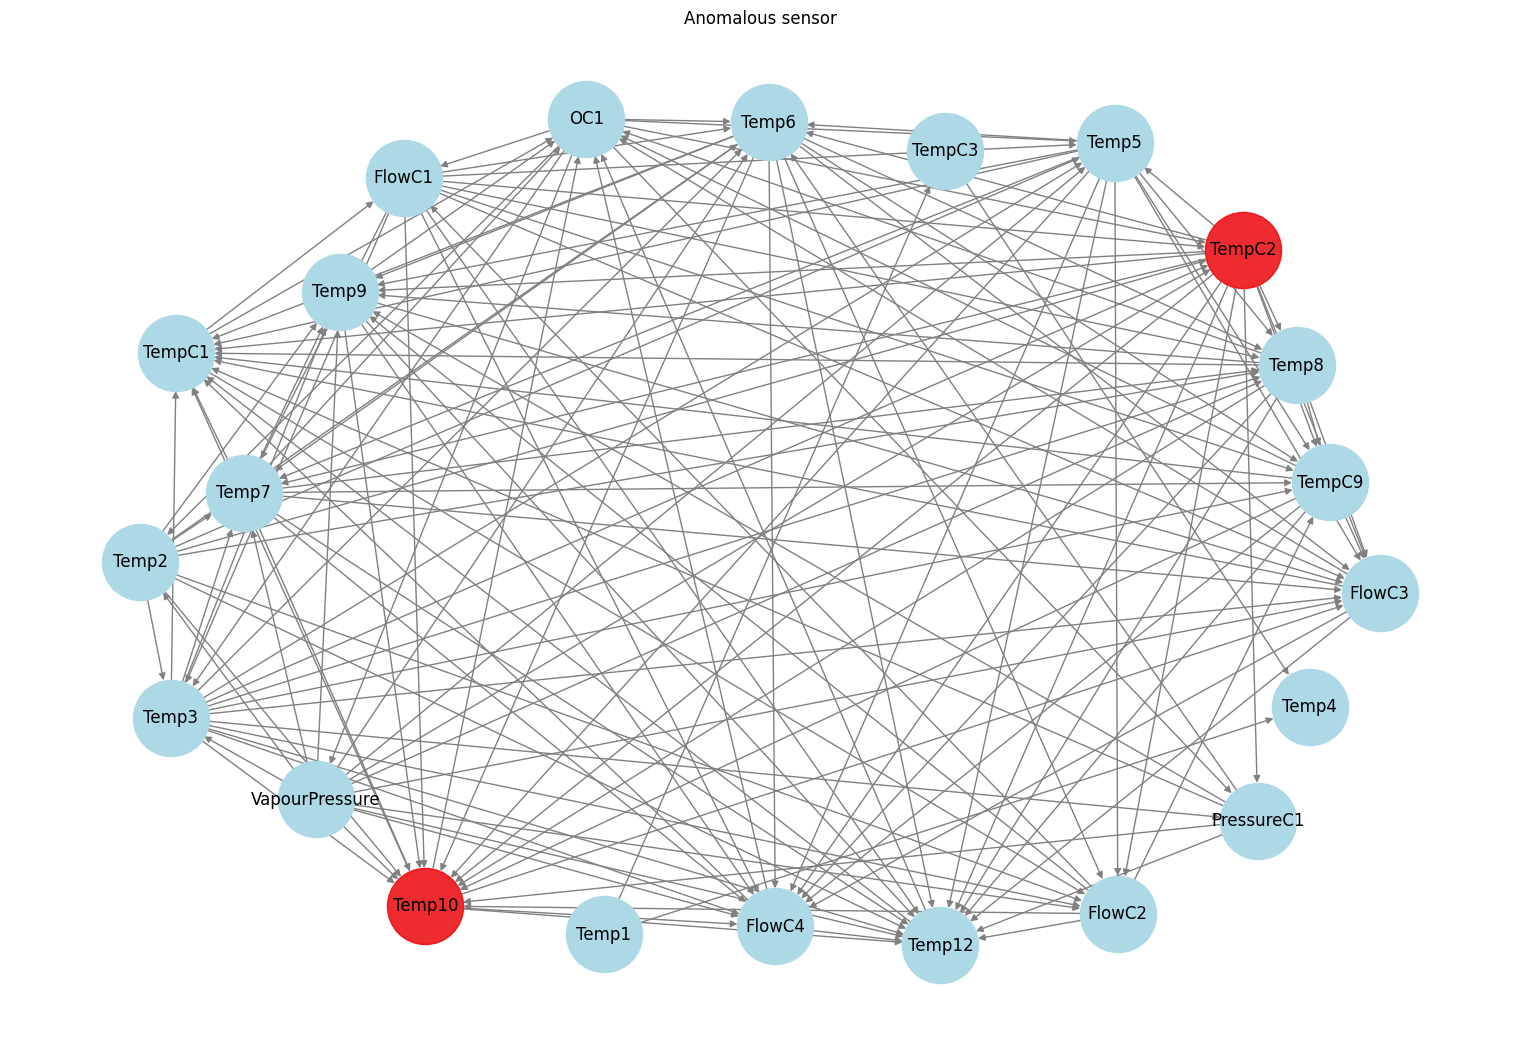

In [45]:
# Visualization code for showing anomalies on the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=6)  # Adjust for better layout if needed
nx.draw(G, pos, with_labels=False, node_size=3000, font_size=12, arrows=True, node_color='lightblue', edge_color='gray')

# Highlight anomalous sensors in red
for idx, name in enumerate(sensor_names):
    if idx in anomalous_indices_external:
        nx.draw_networkx_nodes(G, pos, nodelist=[idx], node_color='red', node_size=3000, alpha=0.8)

node_labels = {node_index: sensor_names[node_index] for node_index in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

plt.title("Anomalous sensor")
plt.show()